In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/welding-io/Final Output csv.csv


#### Reading the output dataset we got at end of previous notebook

In [3]:
df = pd.read_csv('/kaggle/input/welding-io/Final Output csv.csv')
df.head()


,Sr. No,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa
0,1,0,5,15,65.201871,3238.125000,2548.223819,305.786858,60.9500,295.27800
1,2,1,5,15,64.963927,3177.291667,2576.941852,309.233022,69.0155,344.38920
2,3,2,5,15,78.021829,2421.875000,3070.030406,368.403649,63.3755,299.33079
3,4,0,10,15,58.596358,3528.750000,2289.171733,274.700608,63.4955,274.33481
4,5,1,10,15,62.713661,3260.625000,2465.709271,295.885112,64.4115,291.20844


#### Dropping null values if any to clean the dataset for further analysis

In [4]:
x = df.copy().dropna()

x.head()

,Sr. No,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa
0,1,0,5,15,65.201871,3238.125000,2548.223819,305.786858,60.9500,295.27800
1,2,1,5,15,64.963927,3177.291667,2576.941852,309.233022,69.0155,344.38920
2,3,2,5,15,78.021829,2421.875000,3070.030406,368.403649,63.3755,299.33079
3,4,0,10,15,58.596358,3528.750000,2289.171733,274.700608,63.4955,274.33481
4,5,1,10,15,62.713661,3260.625000,2465.709271,295.885112,64.4115,291.20844


#### Reiterating the correlation matrix

In [5]:
corr_matrix = x.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,Sr. No,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa
Sr. No,NaN,0.047147,1.936761e-01,9.665990e-01,0.809576,0.806748,0.835265,0.835265,0.007501,0.521066
Distance,NaN,NaN,2.918852e-17,1.601741e-16,0.241361,0.356538,0.247967,0.247967,0.037044,0.373301
Gas Flow Rate,NaN,NaN,NaN,8.865446e-17,0.117936,0.049043,0.104980,0.104980,0.046122,0.251059


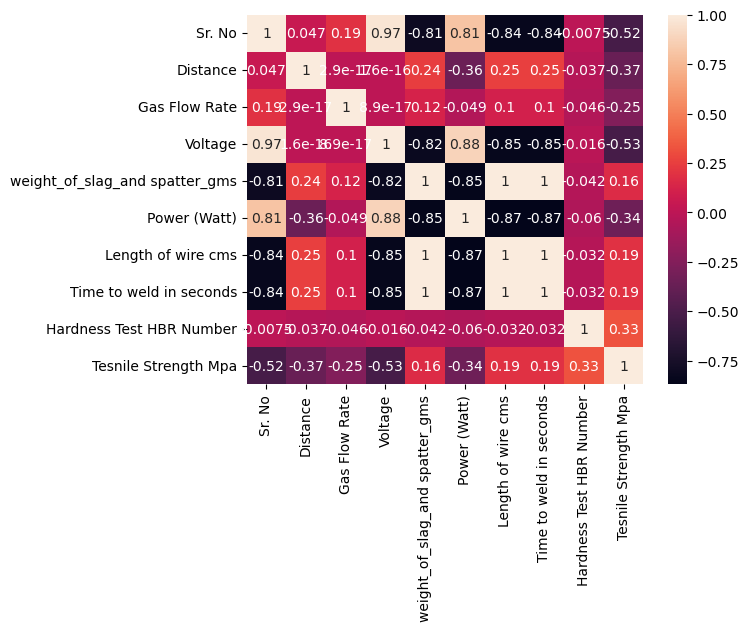

#### Gauging range of values (max and min) in each column

In [7]:
x.max(axis='rows')


Sr. No                              60.000000
Distance                             2.000000
Gas Flow Rate                       20.000000
Voltage                             40.000000
weight_of_slag_and spatter_gms     100.113062
Power (Watt)                      5662.708333
Length of wire cms                3667.277033
Time to weld in seconds            440.073244
Hardness Test HBR Number            75.100000
Tesnile Strength Mpa               356.667000
dtype: float64

In [8]:
x.min(axis='rows')


Sr. No                               1.000000
Distance                             0.000000
Gas Flow Rate                        5.000000
Voltage                             15.000000
weight_of_slag_and spatter_gms      31.730917
Power (Watt)                      1951.562500
Length of wire cms                1168.543360
Time to weld in seconds            140.225203
Hardness Test HBR Number            47.650000
Tesnile Strength Mpa               179.722000
dtype: float64

#### Converting a column into an array( or list) for ease of calculation

In [9]:
time = x["Time to weld in seconds"].values.tolist()
hbr = x["Hardness Test HBR Number"].values.tolist()
weight = x["weight_of_slag_and spatter_gms"].values.tolist()
tensile = x["Tesnile Strength Mpa"].values.tolist()


#### Finding the span of values in each of the lists

In [19]:
mxt = int(max(time))
mnt = int(min(time))
dift = mxt-mnt

mxw = int(max(weight))
mnw = int(min(weight))
difw = int(mxw - mnw )

mxhbr = int(max(hbr))
mnhbr = int(min(hbr))
difhbr = int(mxhbr - mnhbr)

mxts = int(max(tensile))

#### Creating new lists to store data which will generate in further steps

In [11]:
timescore = []
weightscore = []
score=[]
optimal= []

#### Determining time_score for each row

In [12]:
for it in time:
    if it >= mnt and it < (mnt+ dift/5) :
        ind = time.index(it)
        timescore.insert(ind,1)

for it in time:
    if it >= (mnt+dift/5) and it < (mnt+ 2*dift/5) :
        ind = time.index(it)
        timescore.insert(ind,2)

for it in time:
    if it >= (mnt+2*dift/5) and it < (mnt+ 3*dift/5) :
        ind = time.index(it)
        timescore.insert(ind,3)
for it in time:
    if it >= (mnt+3*dift/5) and it < (mnt+ 4*dift/5) :
        ind = time.index(it)
        timescore.insert(ind,4)
for it in time:
    if it >= (mnt+4*dift/5) and it <= mxt :
        ind = time.index(it)
        timescore.insert(ind,5)



#### Determining weight_score for each row

In [13]:
for it in weight:
    if it >= mnw and it < (mnw+ difw/5) :
        ind = weight.index(it)
        weightscore.insert(ind,1)

for it in weight:
    if it >= (mnw + difw/5) and it < (mnw+ 2*difw/5) :
        ind = weight.index(it)
        weightscore.insert(ind,2)
for it in weight:
    if it >= (mnw + 2*difw/5) and it < (mnw+ 3*difw/5) :
        ind = weight.index(it)
        weightscore.insert(ind,3)
for it in weight:
    if it >= (mnw + 3*difw/5) and it < (mnw+ 4*difw/5) :
        ind = weight.index(it)
        weightscore.insert(ind,4)
for it in weight:
    if it >= (mnw + 4*difw/5) and it < mxw :
        ind = weight.index(it)
        weightscore.insert(ind,5)
        


#### Adding timescore and weightscore to output dataset

In [14]:
x['timescore'] = pd.Series(timescore)
x['weightscore'] = pd.Series(weightscore)
x.head()

,Sr. No,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa,timescore,weightscore
0,1,0,5,15,65.201871,3238.125000,2548.223819,305.786858,60.9500,295.27800,3.0,3.0
1,2,1,5,15,64.963927,3177.291667,2576.941852,309.233022,69.0155,344.38920,3.0,3.0
2,3,2,5,15,78.021829,2421.875000,3070.030406,368.403649,63.3755,299.33079,4.0,4.0
3,4,0,10,15,58.596358,3528.750000,2289.171733,274.700608,63.4955,274.33481,1.0,1.0
4,5,1,10,15,62.713661,3260.625000,2465.709271,295.885112,64.4115,291.20844,3.0,1.0


#### Determining operator fatigue score based on values of timescore and weightscore

In [18]:
for i in range(0,len(timescore)):
    val = (0.80 + 0.1 + 0.25) * timescore[i] + (0.85 + 0.12 + 0.24 )*weightscore[i]  # coeffs obtained from corelation matrix
    score.insert(i,val)
min(score)

        

2.36

#### Addding operator fatigue score to output dataset

In [16]:
x['Operator Fatigue Score'] = pd.Series(score)
x


,Sr. No,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa,timescore,weightscore,Operator Fatigue Score
0,1,0,5,15,65.201871,3238.125000,2548.223819,305.786858,60.9500,295.27800,3.0,3.0,7.08
1,2,1,5,15,64.963927,3177.291667,2576.941852,309.233022,69.0155,344.38920,3.0,3.0,7.08
2,3,2,5,15,78.021829,2421.875000,3070.030406,368.403649,63.3755,299.33079,4.0,4.0,9.44
3,4,0,10,15,58.596358,3528.750000,2289.171733,274.700608,63.4955,274.33481,1.0,1.0,2.36
4,5,1,10,15,62.713661,3260.625000,2465.709271,295.885112,64.4115,291.20844,3.0,1.0,4.66
5,6,2,10,15,76.725542,2505.208333,2990.307490,358.836899,60.9800,233.27790,4.0,4.0,9.44
6,7,0,15,15,70.875477,3011.875000,2724.296818,326.915618,64.4120,294.92267,4.0,3.0,8.23
7,8,1,15,15,86.279826,2406.041667,3283.228336,393.987400,66.4955,272.64887,5.0,5.0,11.80
8,9,2,15,15,100.113062,1951.562500,3667.277033,440.073244,63.4815,228.02820,3.0,1.0,4.66
9,10,0,20,15,68.538880,3451.666667,2647.871028,317.744523,63.4255,282.32533,1.0,3.0,4.78


#### Final Corelation matrix having all parameters

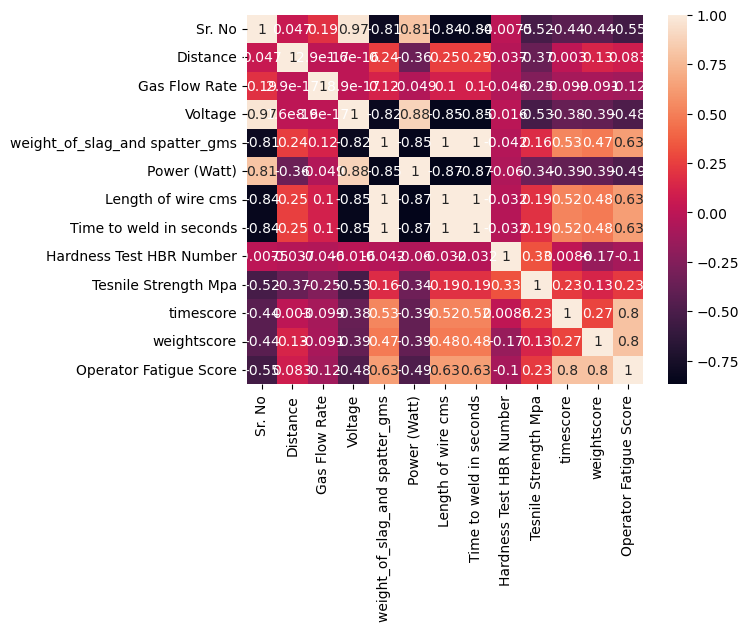

In [29]:
ax = sns.heatmap(x.corr(), annot=True)

### Optimal parameters

##### Logic - Identify output paramter out of Hardness Strength, Tensile Strength and Operator fatigue which affects a given input parameter the most. Assign that value to each parameter

##### Optimal parameter for gas flow rate
Hardness of steel is affected by gas flow rate the most among the three

In [43]:
 for itr in hbr:
        if itr > 0.85*mxhbr:
            gas_flow_rate = x.at[hbr.index(itr), 'Gas Flow Rate']
            
   
    
print('Optimal parameter for gas flow rate is : ',gas_flow_rate)

optimal parameter for gas flow rate is :  15


##### Optimal parameter for Voltage
Tensile strength is affected by voltage the most among the three

In [50]:
 for itr in tensile:
        if itr > 0.85*mxts:
            voltage = x.at[tensile.index(itr), 'Voltage']
            
            
   
    
print('Optimal parameter for voltage is : ',voltage)

optimal parameter for voltage is :  30


#### Optimal parameter for gas flow rate
Operator fatigue score is affected by distance the most among the three

In [53]:
 for itr in score:
        if itr == min(score):
            distance = x.at[score.index(itr), 'Distance']
            
            
print('Optimal parameter for voltage is : ',distance)

optimal parameter for voltage is :  0


## Result
##### The output parameter of Operator fatigue is developed using this notebook
##### This notebook establishes relation among all the input & output parameters. 
##### We also get Optimal parameters ( Distance: near, Gas Flow Rate: 15L/min, Voltage: 30V )